In [233]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [234]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [235]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [236]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [237]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [238]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [239]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [240]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [252]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

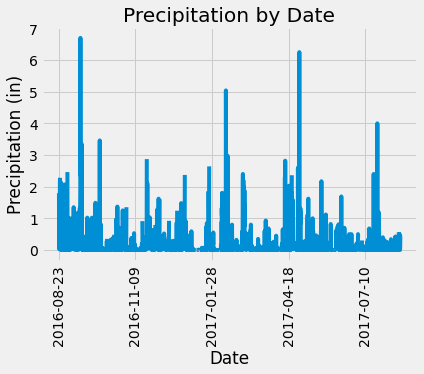

In [260]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_by_date = pd.DataFrame(last_year_prcp, columns=['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
sorted_prcp = prcp_by_date.sort_values('Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp.plot(legend=None)
plt.ylabel('Precipitation (in)')
plt.xticks(rotation = 90)
plt.title('Precipitation by Date')
plt.show()

In [245]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [246]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
station_count

9

In [256]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [248]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter_by(station='USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter_by(station='USC00519281').all()
average_temp = session.query(func.avg(Measurement.tobs)).\
    filter_by(station='USC00519281').all()

print(lowest_temp)
print(highest_temp)
print(average_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


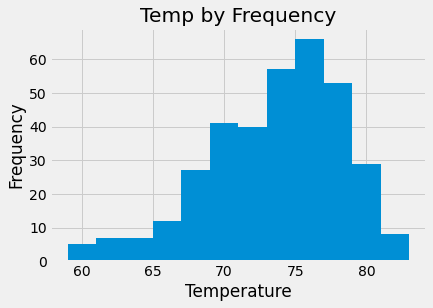

In [261]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_temps = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == 'USC00519281').all()
temp_by_date = pd.DataFrame(last_year_temps, columns=['Temperature'])

temp_by_date.hist(legend=None, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temp by Frequency')
plt.show()

# Close session

In [250]:
# Close Session
session.close()